# Logistic Regression

## Problem statement

Based on Pima Indians historical diabetes data,build a machine learning binary classification model to predict if the person is diabetic or not based on below features

Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no missing values in our data now let's see distribution of data.


# Data Preprocessing(Analysis(EDA))

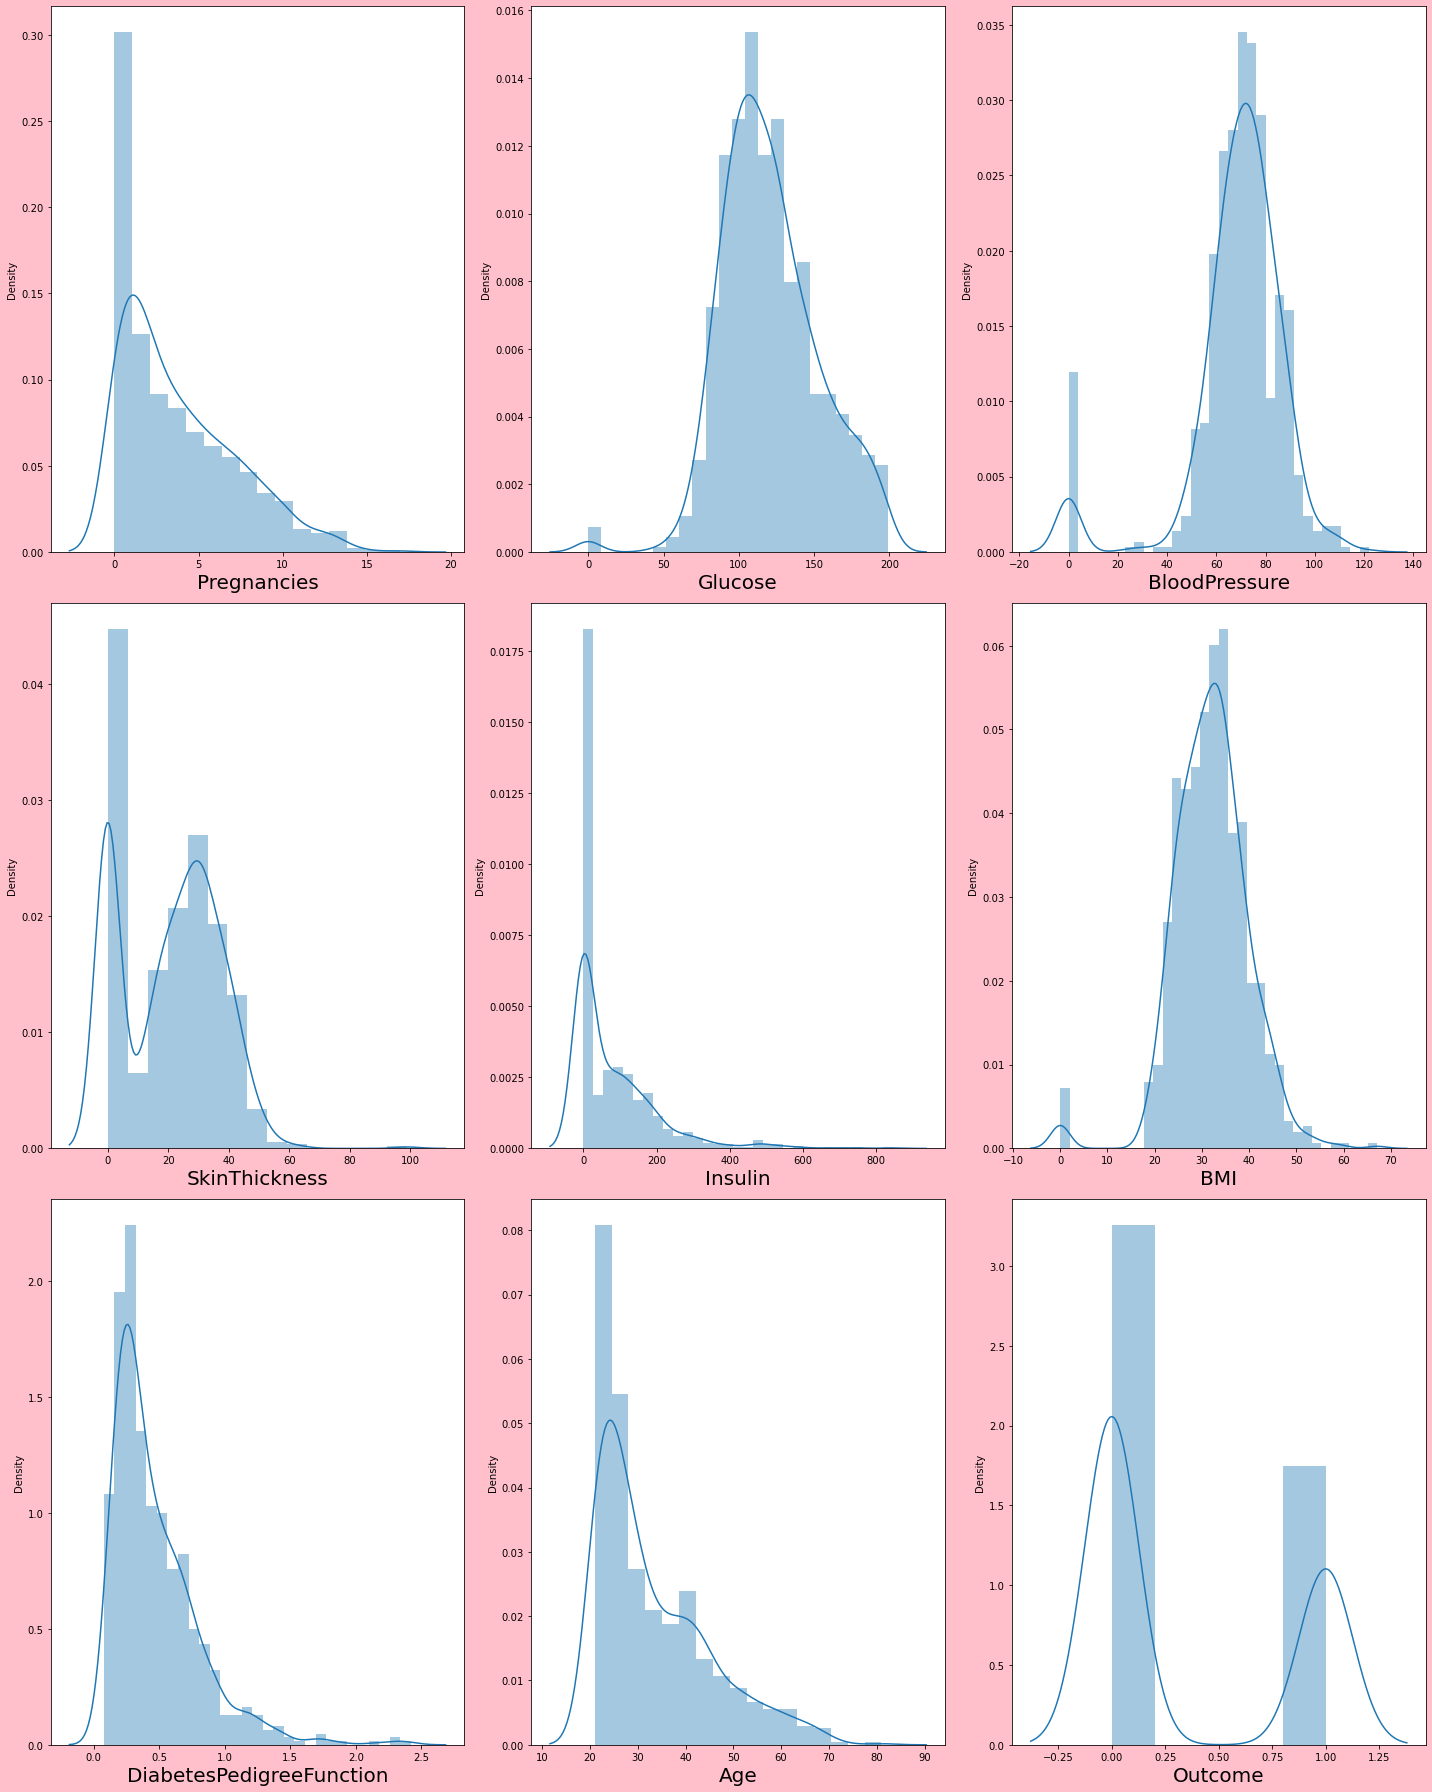

In [5]:
# Let's see how data is distributed for every 
plt.figure(figsize = (20,25),facecolor = 'pink')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber +=1
        plt.tight_layout()

In [6]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())


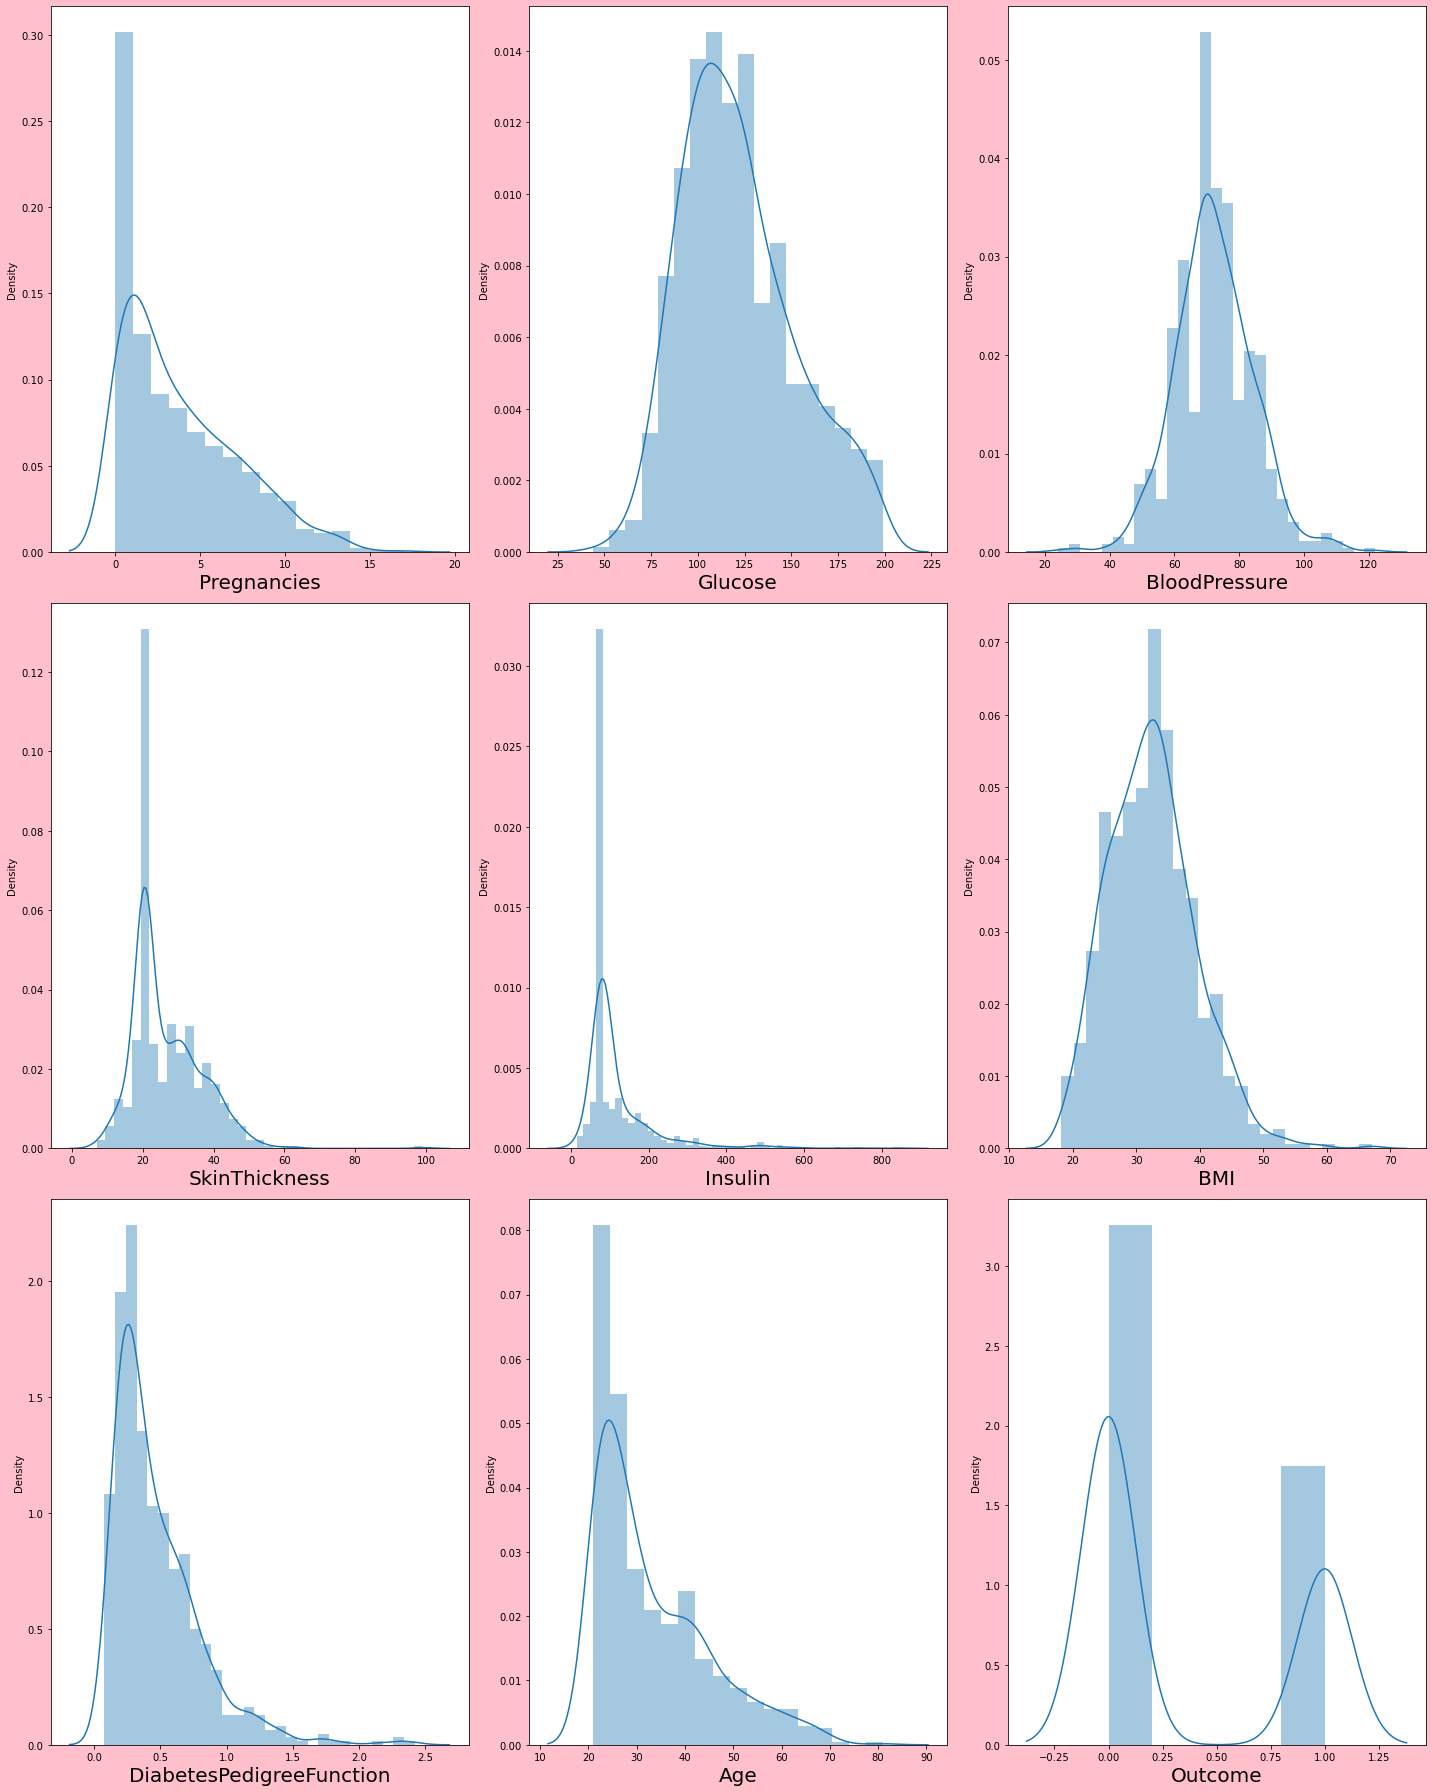

In [7]:
# Let's see how data is distributed for every column
plt.figure(figsize = (20,25),facecolor = 'pink')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber +=1
        plt.tight_layout()

Now we have deal with the 0 values and data look better.But,there are still outliers present in some columns.Let's deal with them.

In [8]:
df_features = data.drop('Outcome',axis = 1)

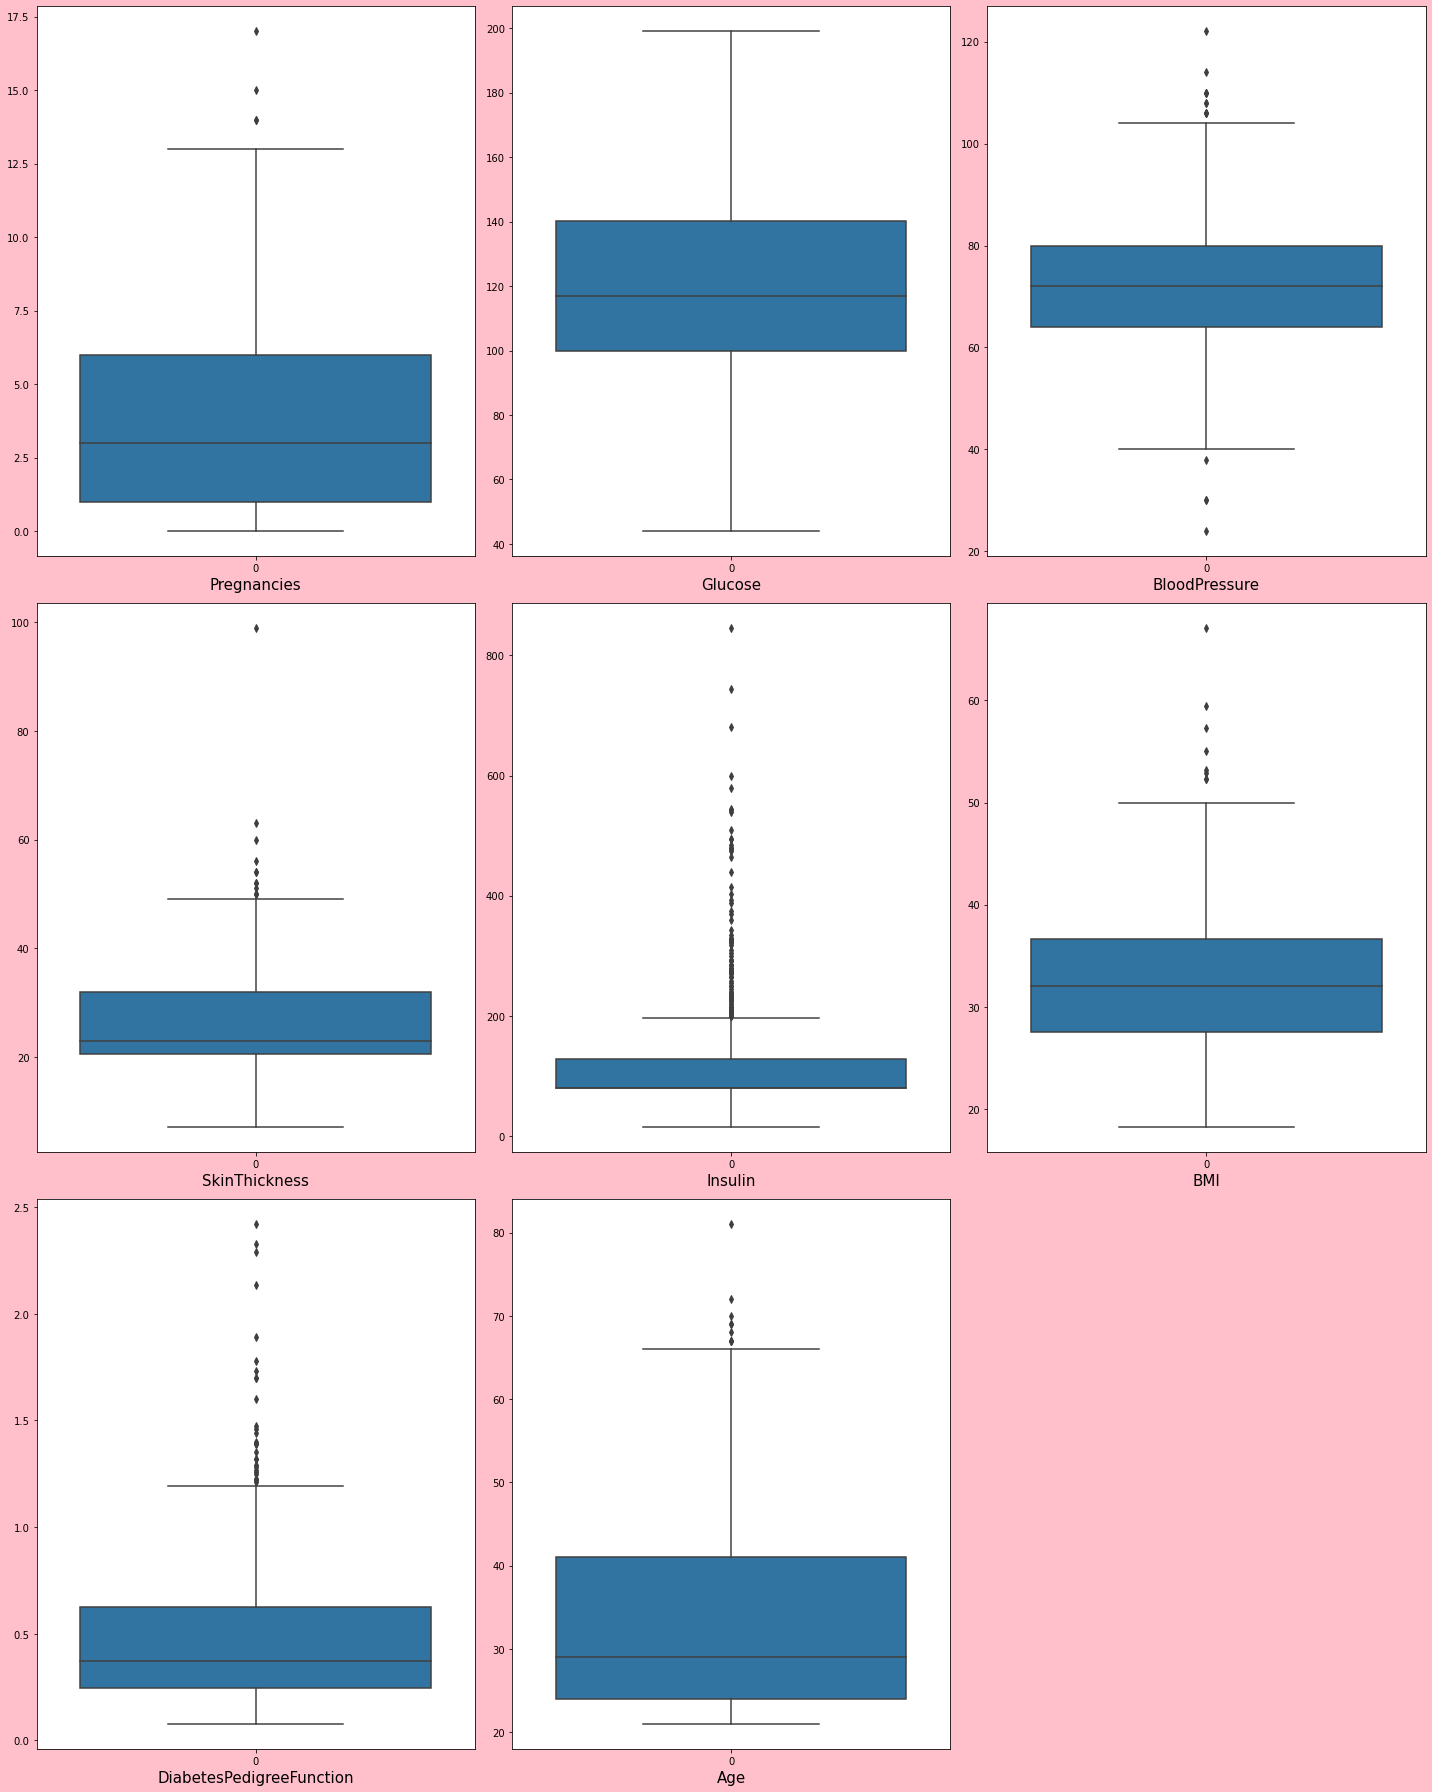

In [9]:
# visualise the outliers using boxplot
plt.figure(figsize = (20,25),facecolor = 'pink')
plotnumber = 1
for column in df_features:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data= df_features[column])
        plt.xlabel(column,fontsize = 15)
        plotnumber +=1
        plt.tight_layout()

In [10]:
data.shape

(768, 9)

In [11]:
# Find the IQR (inter quantile range ) to identify outliers
# 1st Quantile
q1 = data.quantile(0.23)
# 3rd Quantile
q3 = data.quantile(0.75)
# IQR
iqr = q3 - q1

In [12]:
# validating one outlier
preg_high = q3.Pregnancies + (1.5 * iqr.Pregnancies)
preg_high

13.5

In [14]:
# check the indexes which have higher values
index = np.where(data['Pregnancies'] > preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [15]:
# Drop the indexes which we found in the above cell
data = data.drop(data.index[index])
data.shape

(764, 9)

In [17]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
bp_high = q3.BloodPressure + (1.5 * iqr.BloodPressure)
print(bp_high)
index = np.where(data['BloodPressure'] > bp_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
index

(array([], dtype=int64),)

In [21]:
st_high = q3.SkinThickness + (1.5 * iqr.SkinThickness)
print(st_high)
index = np.where(data['SkinThickness'] > st_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
insu_high = q3.Insulin + (1.5 * iqr.Insulin)
print(insu_high)
index = np.where(data['Insulin'] > insu_high)
print(index)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

198.42578125
(array([  8,  13,  16,  20,  31,  39,  52,  53,  55,  71,  90, 104, 124,
       131, 136, 144, 152, 175, 184, 188, 195, 203, 208, 216, 219, 235,
       236, 242, 246, 265, 272, 273, 282, 283, 294, 305, 320, 344, 345,
       348, 354, 359, 372, 376, 379, 393, 396, 399, 408, 409, 435, 440,
       462, 467, 468, 469, 493, 501, 519, 521, 526, 527, 535, 541, 554,
       563, 572, 584, 586, 590, 623, 633, 635, 648, 654, 660, 669, 674,
       681, 684, 687, 689, 695, 722, 727], dtype=int64),)
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
bmi_high = q3.BMI + (1.5 * iqr.BMI)
print(bmi_high)
index = np.where(data['BMI'] > bmi_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

50.7885
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
dpf_high = q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction)
print(dpf_high)
index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.211625
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [27]:
age_high = q3.Age + (1.5 * iqr.Age)
print(age_high)
index = np.where(data['Age'] > age_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [28]:
bp_low = q1.BloodPressure - (1.5 * iqr.BloodPressure)
print(bp_low)
index = np.where(data['BloodPressure'] < bp_low)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


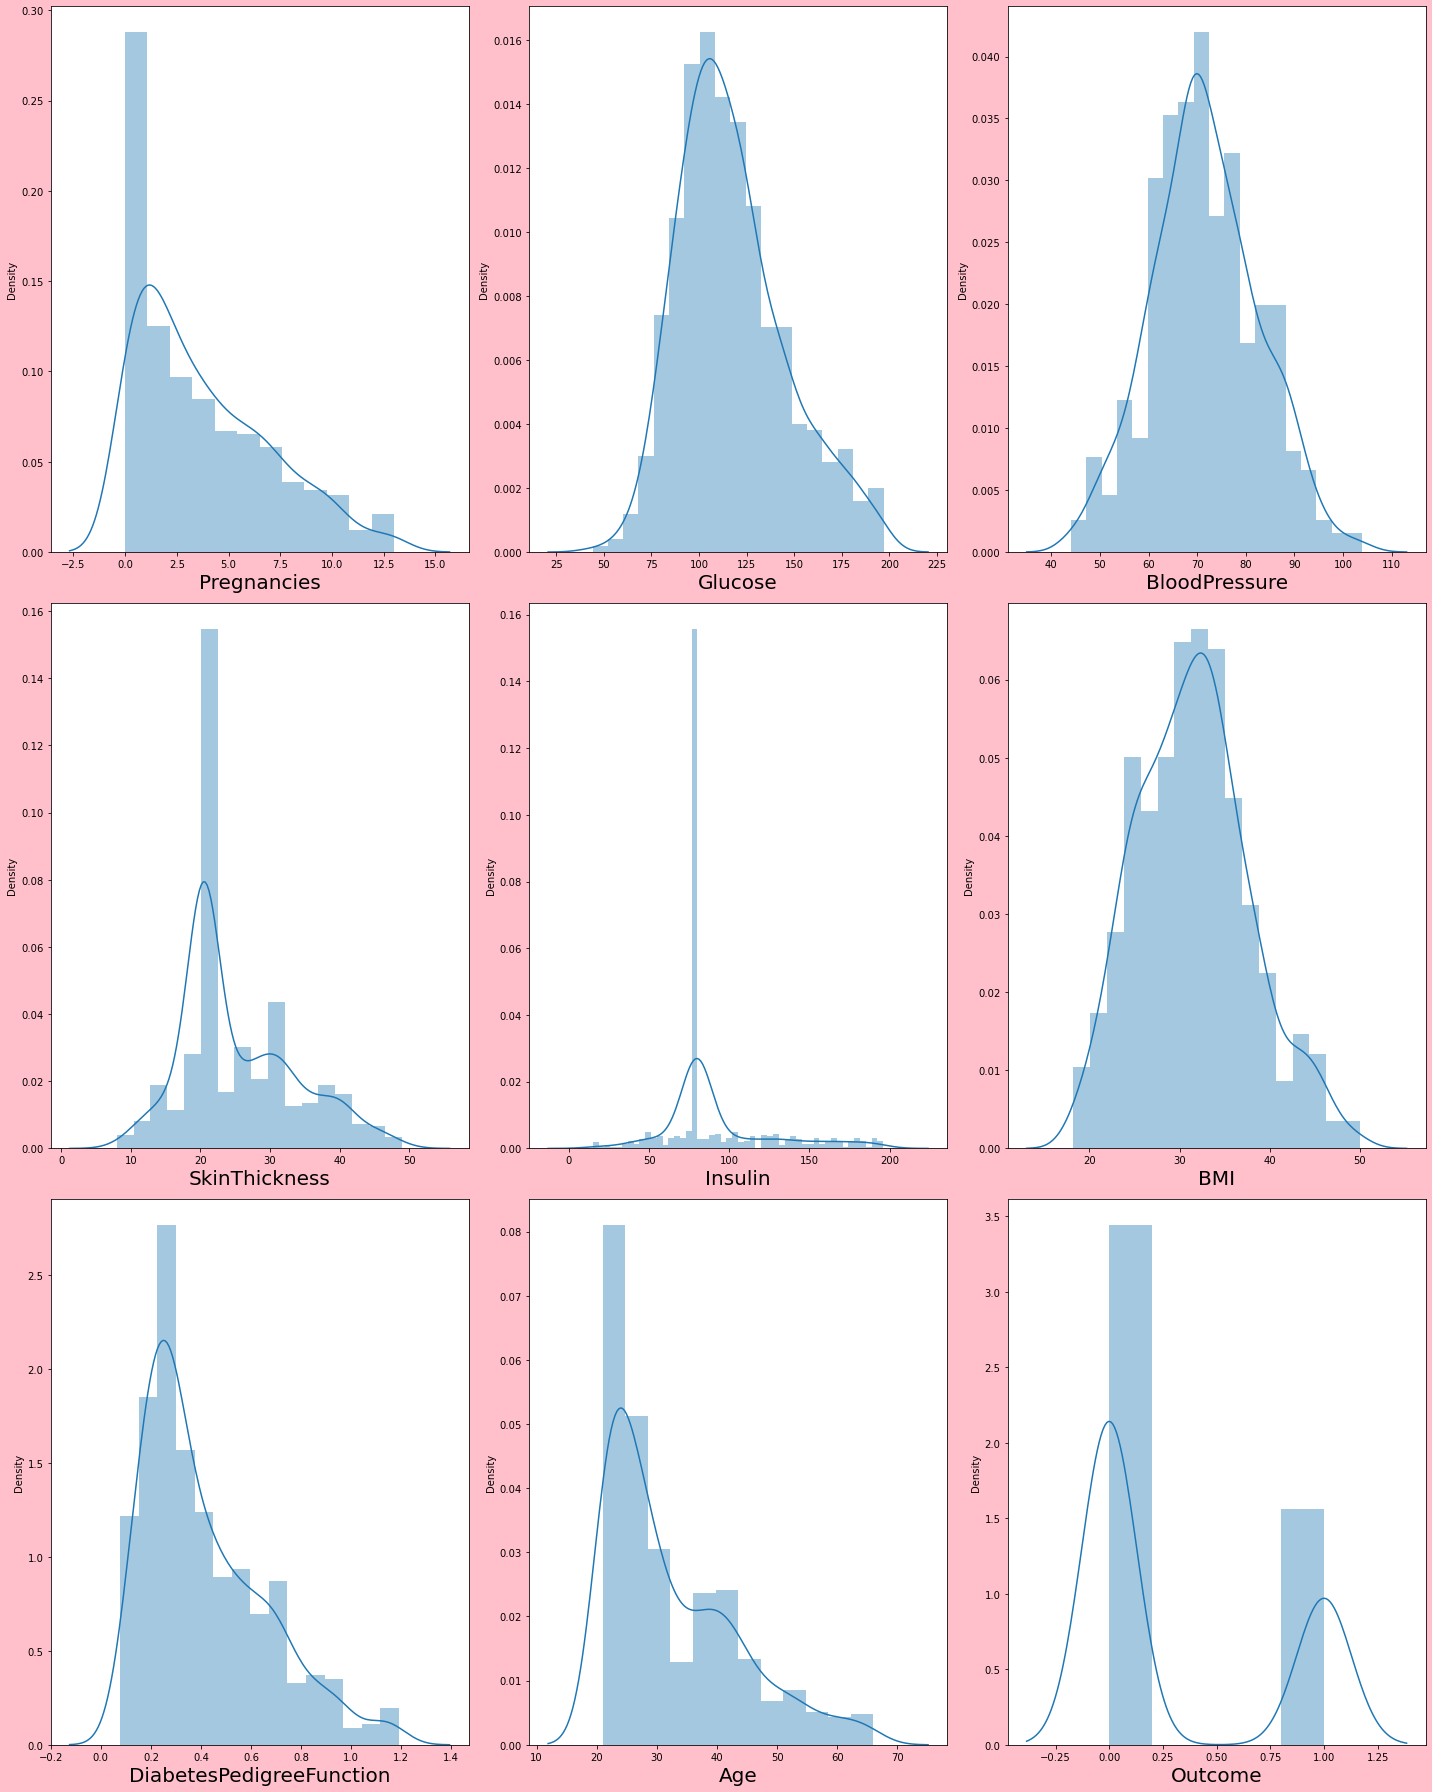

In [29]:
plt.figure(figsize = (20,25),facecolor = 'pink')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber +=1
        plt.tight_layout()

The data looks much better now than before.We will start our analysis with this data now as we don't want to lose important information if our model doesn't work with accuracy.we will come back for more preprocessing.

In [30]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

Before we fit our data to a model let's visualise the relationship between our independent variables and categories.

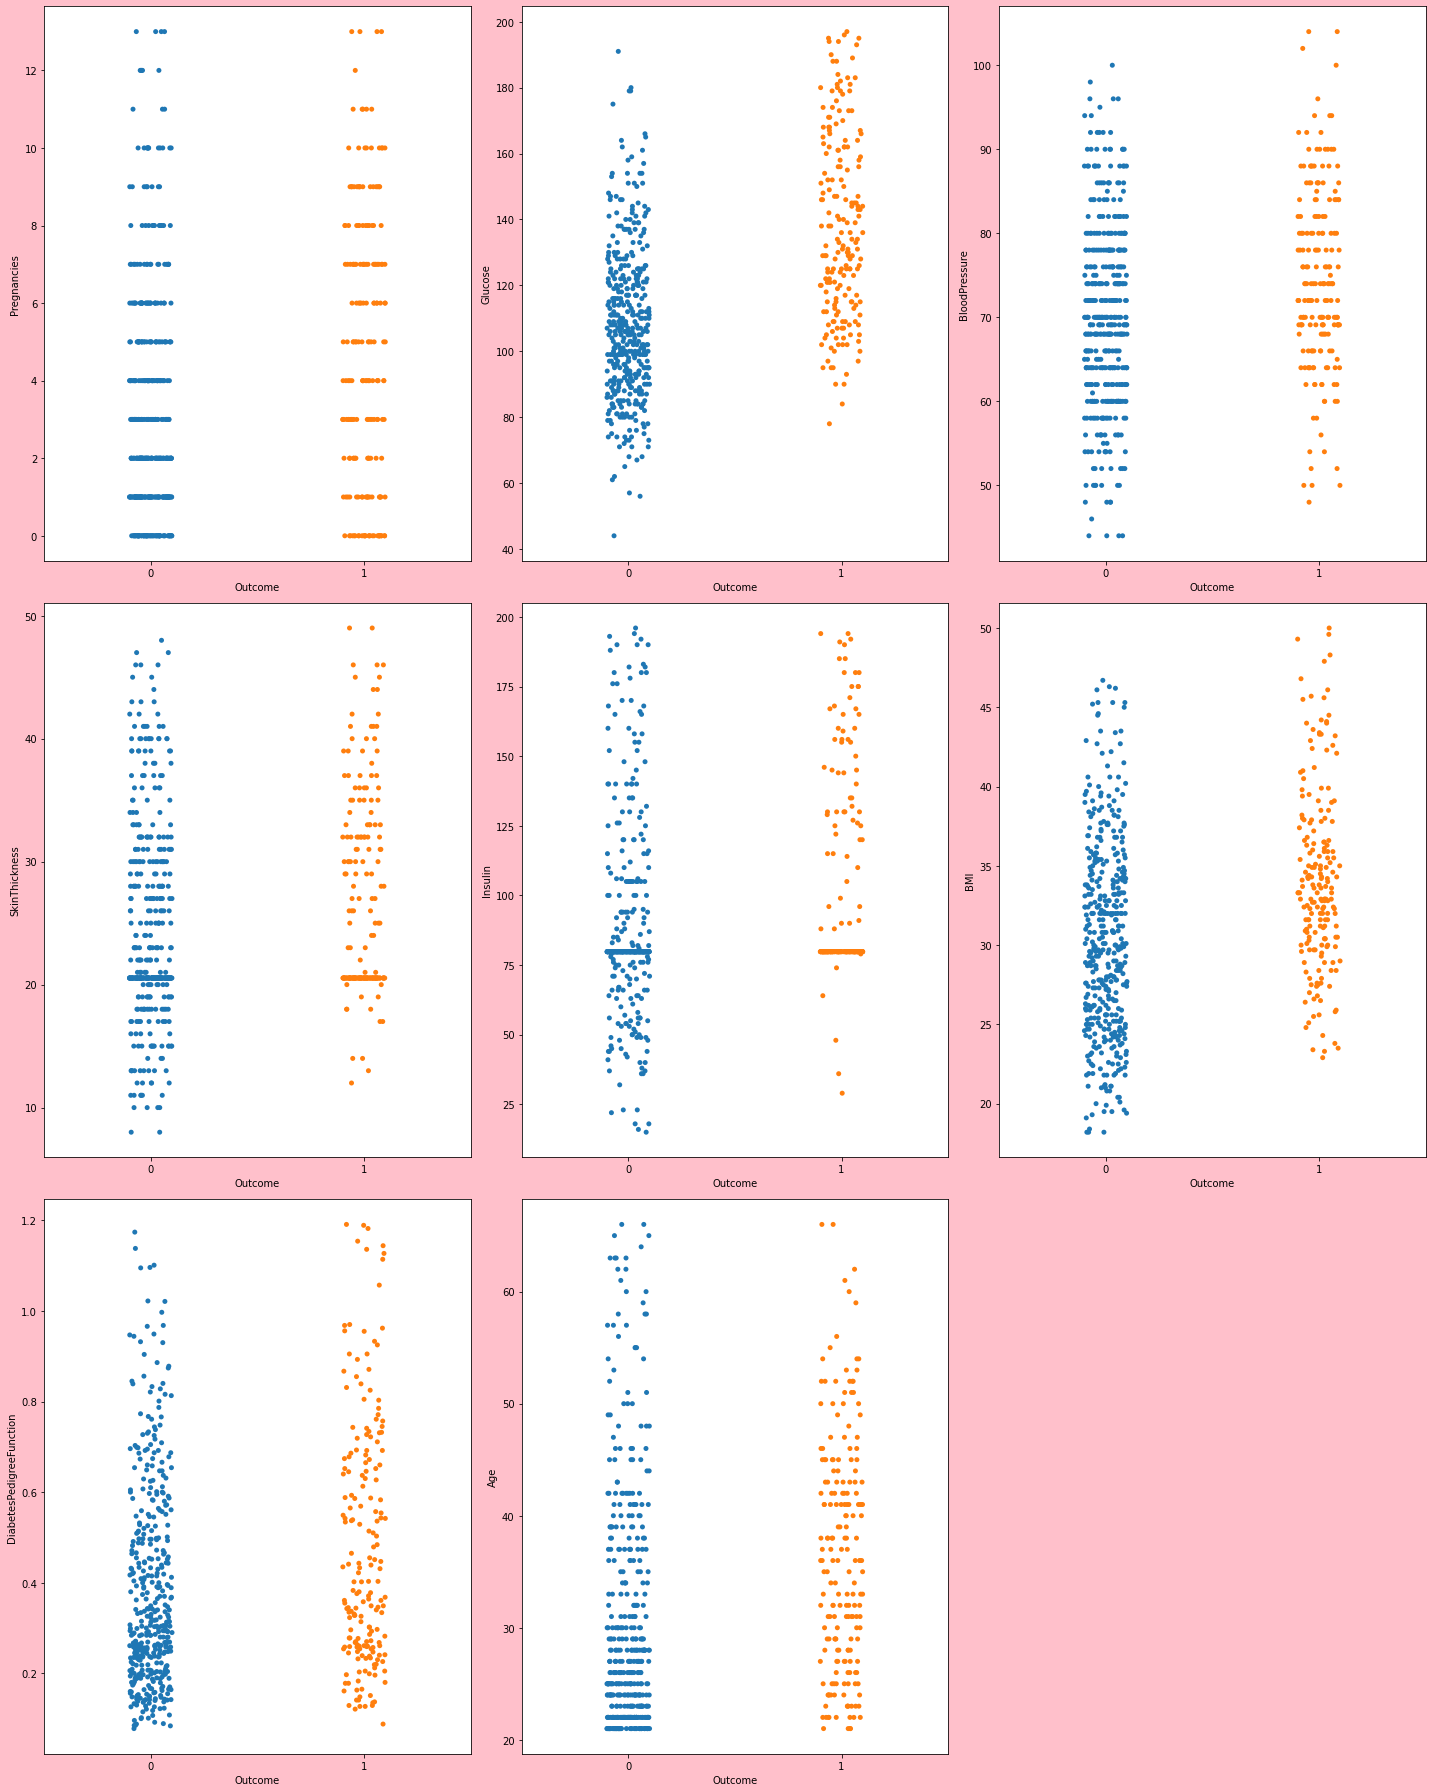

In [31]:
# let's see how features are related to a class
plt.figure(figsize = (20,25),facecolor = 'pink')
plotnumber = 1
for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        plotnumber += 1
        plt.tight_layout()

Let's proceed by checking multicollinearity in the dependent variables.Before that we should scale our data.Let's use standard scaler for that.

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

This is how our data data looks after scaling.Now we check for multicollinearity using VIF (variance inflation factor)

In [33]:
x_scaled.shape

(619, 8)

In [34]:
# Finding variance inflation factor in each scaled column i.e x_scaled.shape[1](1/(1-R2))

In [37]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
#Let's check the data
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF values are less than 5 and are very low.That means no multicollinearity.Now we go ahead with fitting our data to the model.Before that let's split our data in test and training set

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 355)

In [39]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

Let's see how well our model performs on the test data set.

In [41]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

In [42]:
# Model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [43]:
# consfusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]], dtype=int64)

In [44]:
# Let's check accuracy model manually
Accuracy = (94+24)/(94+11+26+24)
Accuracy

0.7612903225806451

# Similarly you can manually calculate recall/precision/F1 Score

In [45]:
from sklearn.metrics import classification_report


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



In [47]:
# ROC Curve
fpr, tpr, threshholds = roc_curve(y_test,y_pred)

In [48]:
# threshholds [0 ] means no instances predicted(it should be read from 0 - max)
print('Threshholds =',threshholds)
print('True Positive Rate =',tpr)
print('False Positive Rate =',fpr)

Threshholds = [2 1 0]
True Positive Rate = [0.   0.48 1.  ]
False Positive Rate = [0.        0.1047619 1.       ]


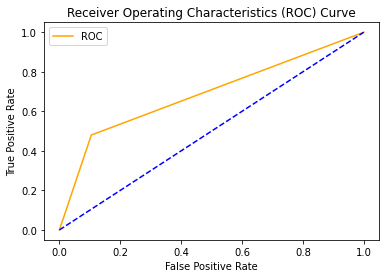

In [49]:
plt.plot(fpr,tpr,color = 'orange',label = 'ROC')
plt.plot([0,1],[0,1],color = 'blue',linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [50]:
# How much area it is covering (AUC)
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6876190476190477
